In [7]:
from PIL import Image
import torch
import numpy as np
import cv2
import albumentations as A
from torch.utils.data import Dataset
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import os.path as osp
import math
import json
import matplotlib.pyplot as plt


# dataset 지정 및 idx 
data_list=['/data/ephemeral/home/data/vietnamese_receipt', '/data/ephemeral/home/data/japanese_receipt', 
           '/data/ephemeral/home/data/thai_receipt','/data/ephemeral/home/data/chinese_receipt']

In [12]:
## 찾아보기
box_dict={}
for i in data_list:
    box_dict[i]={}
    dataset_dir = i

    ufo_fpath=osp.join(dataset_dir,'ufo/train.json')

    with open(ufo_fpath,'r') as f:
        ufo_anno=json.load(f)
    
    for j in sorted(ufo_anno['images']):
        result=[]
        for idx,val in enumerate(ufo_anno['images'][j]['words'].values()):
            for num in range(4):
                if num==0:
                    if abs(val['points'][num][0]-val['points'][3][0])<15 or abs(val['points'][num][0]-val['points'][1][0])<15:
                        pass
                    else:
                        result.append(f'{idx}')
                        break
                elif num==3:
                    if abs(val['points'][num][0]-val['points'][2][0])<15 or abs(val['points'][num][0]-val['points'][0][0])<15:
                        pass
                    else:
                        result.append(f'{idx}')
                        break
                else:
                    if abs(val['points'][num][0]-val['points'][num-1][0])<15 or abs(val['points'][num][0]-val['points'][num+1][0])<15:
                        pass
                    else:
                        result.append(f'{idx}')
                        break

        if len(result)>0:                
            box_dict[i][j]=result


In [21]:
for i,j in box_dict.items():
    print(i,len(j.keys()))

/data/ephemeral/home/data/vietnamese_receipt 21
/data/ephemeral/home/data/japanese_receipt 9
/data/ephemeral/home/data/thai_receipt 19
/data/ephemeral/home/data/chinese_receipt 52


In [24]:
import pprint
for i in box_dict['/data/ephemeral/home/data/vietnamese_receipt'].keys():
    print(i)

extractor.vi.in_house.appen_000026_page0001.jpg
extractor.vi.in_house.appen_000044_page0001.jpg
extractor.vi.in_house.appen_000060_page0001.jpg
extractor.vi.in_house.appen_000061_page0001.jpg
extractor.vi.in_house.appen_000110_page0001.jpg
extractor.vi.in_house.appen_000424_page0001.jpg
extractor.vi.in_house.appen_000427_page0001.jpg
extractor.vi.in_house.appen_000478_page0001.jpg
extractor.vi.in_house.appen_000494_page0001.jpg
extractor.vi.in_house.appen_000512_page0001.jpg
extractor.vi.in_house.appen_000534_page0001.jpg
extractor.vi.in_house.appen_000595_page0001.jpg
extractor.vi.in_house.appen_000597_page0001.jpg
extractor.vi.in_house.appen_000620_page0001.jpg
extractor.vi.in_house.appen_000725_page0001.jpg
extractor.vi.in_house.appen_000737_page0001.jpg
extractor.vi.in_house.appen_000780_page0001.jpg
extractor.vi.in_house.appen_001008_page0001.jpg
extractor.vi.in_house.appen_001015_page0001.jpg
extractor.vi.in_house.appen_001070_page0001.jpg
extractor.vi.in_house.appen_001083_page0

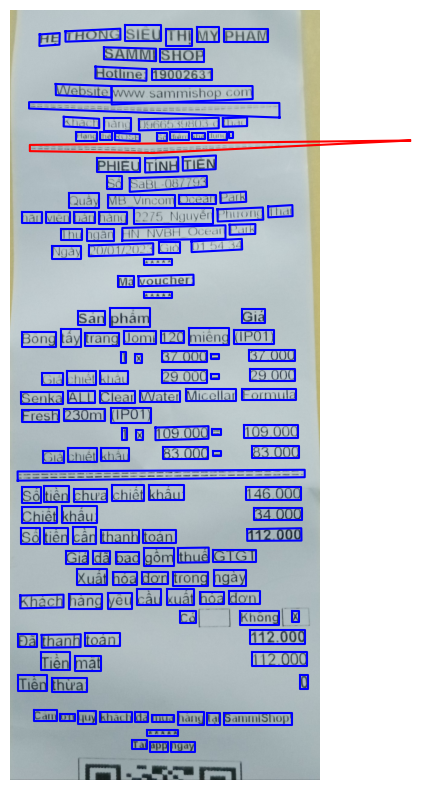

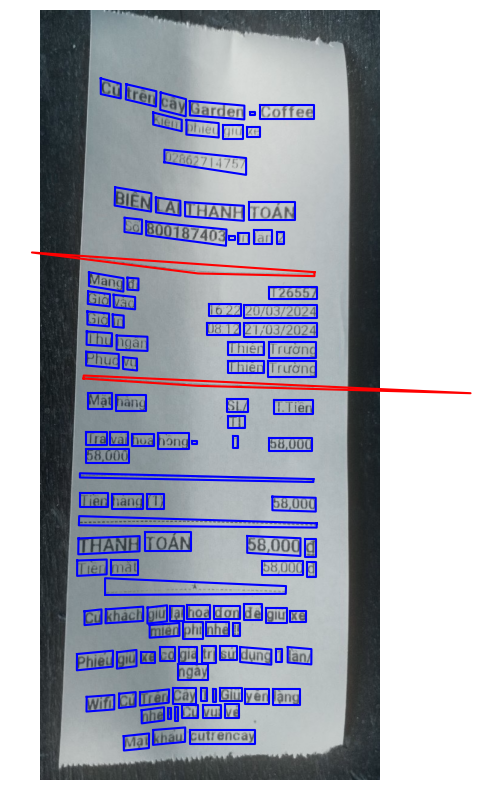

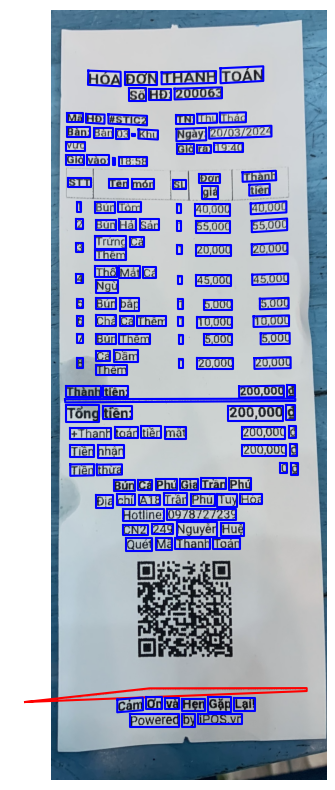

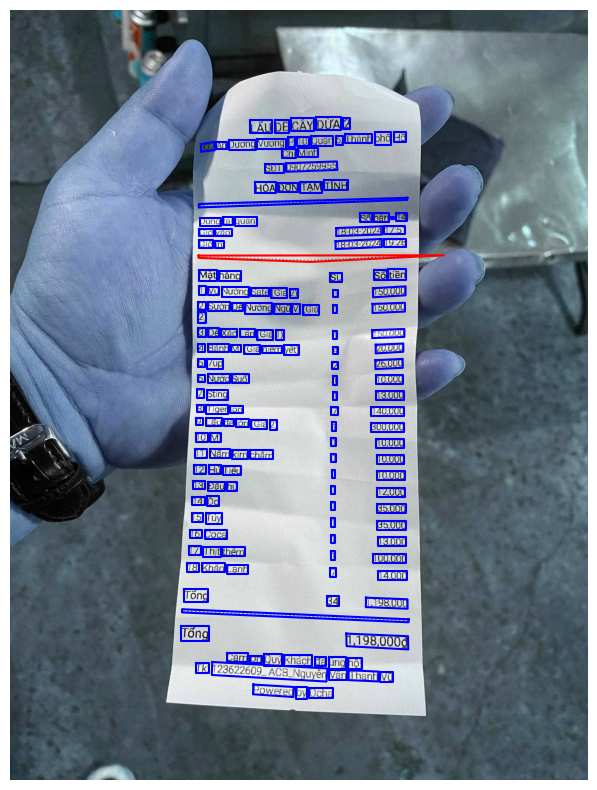

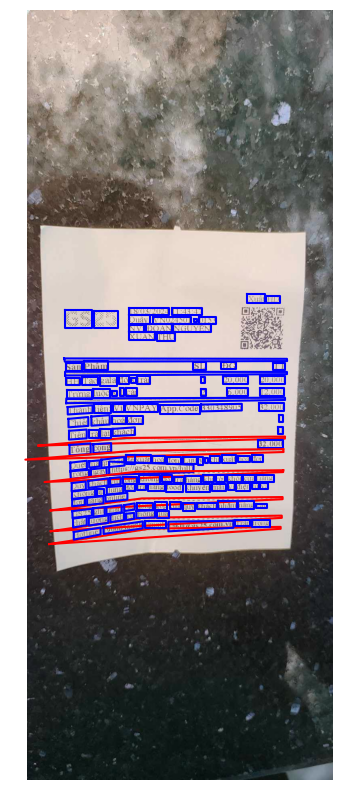

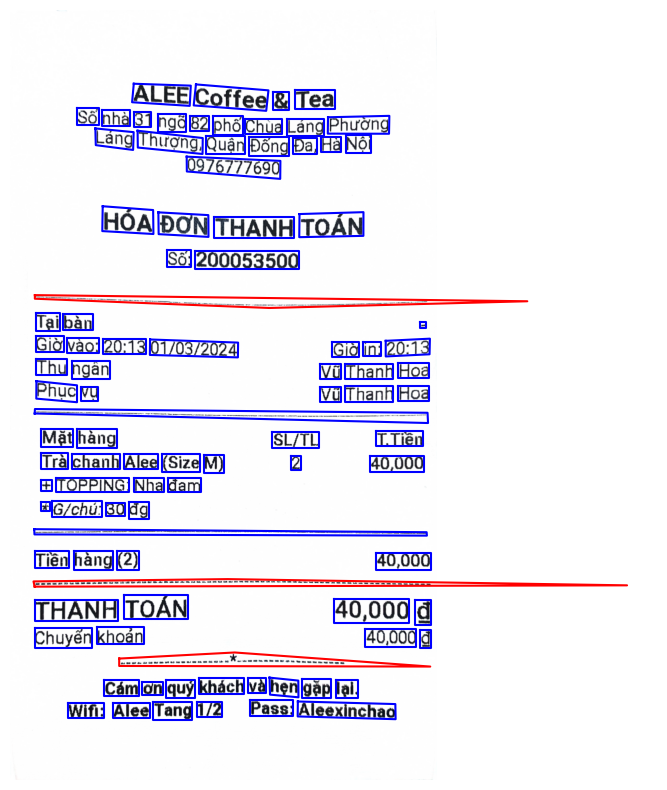

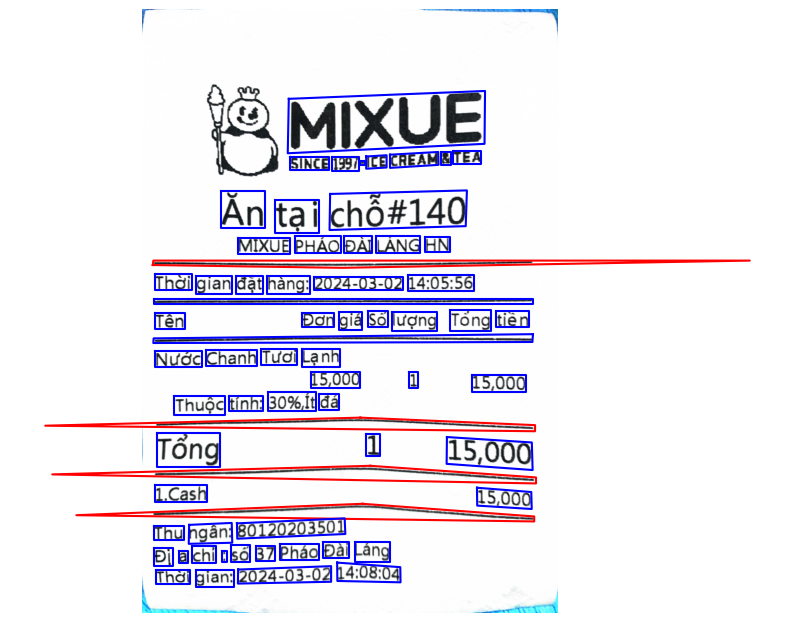

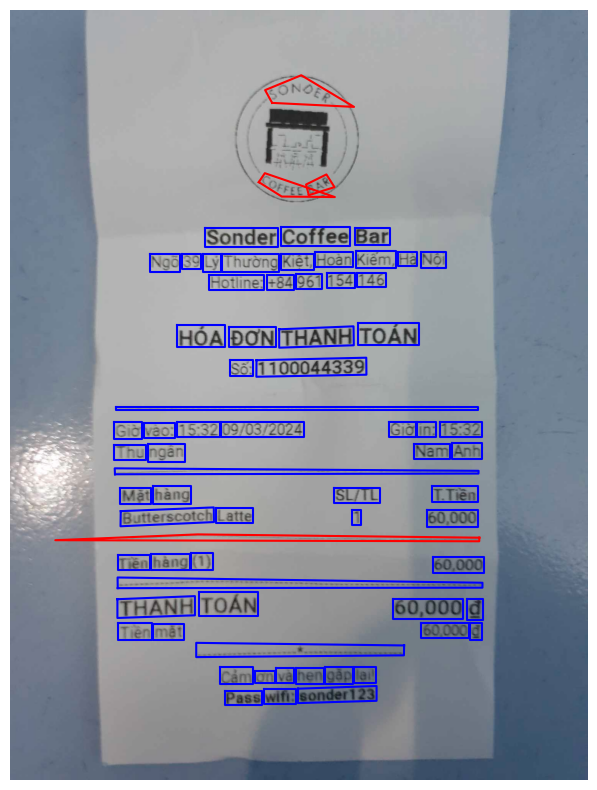

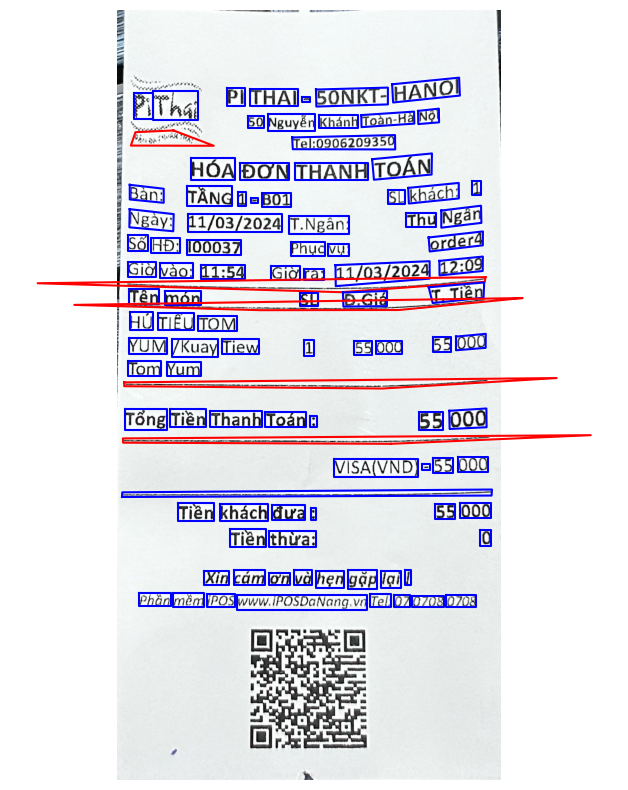

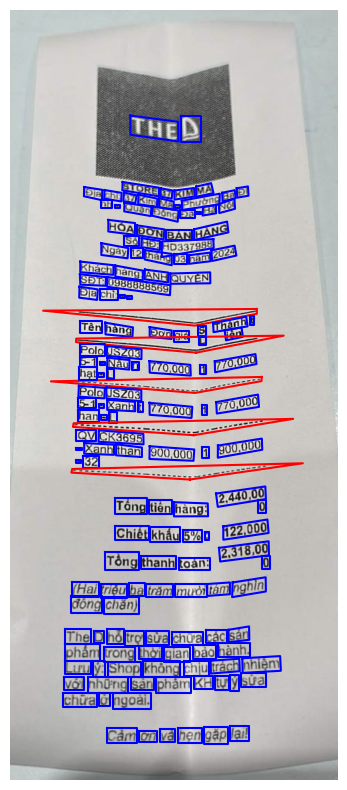

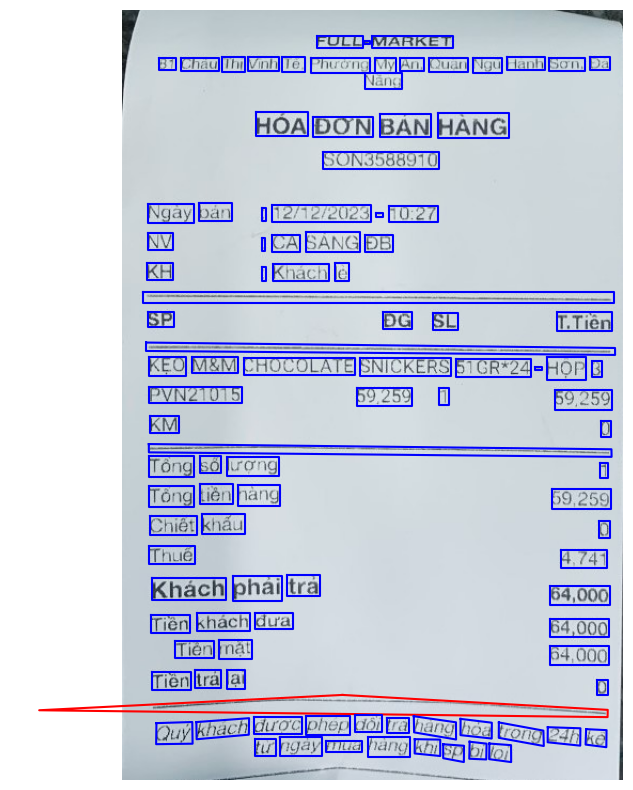

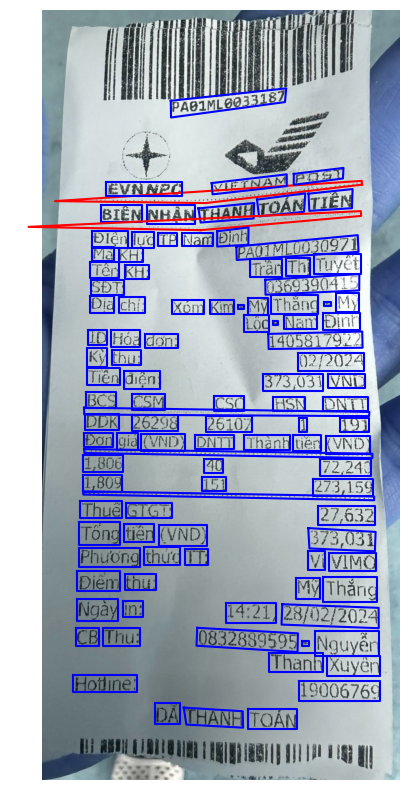

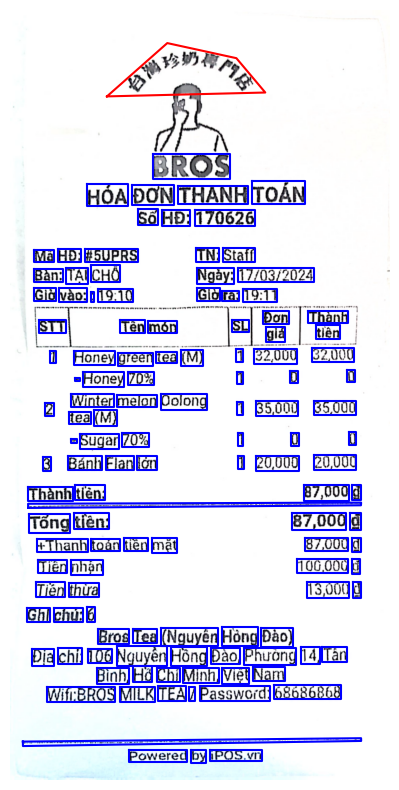

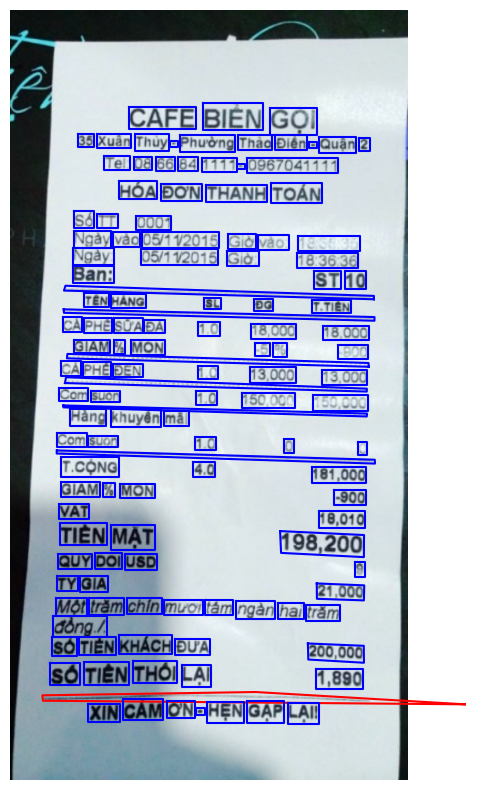

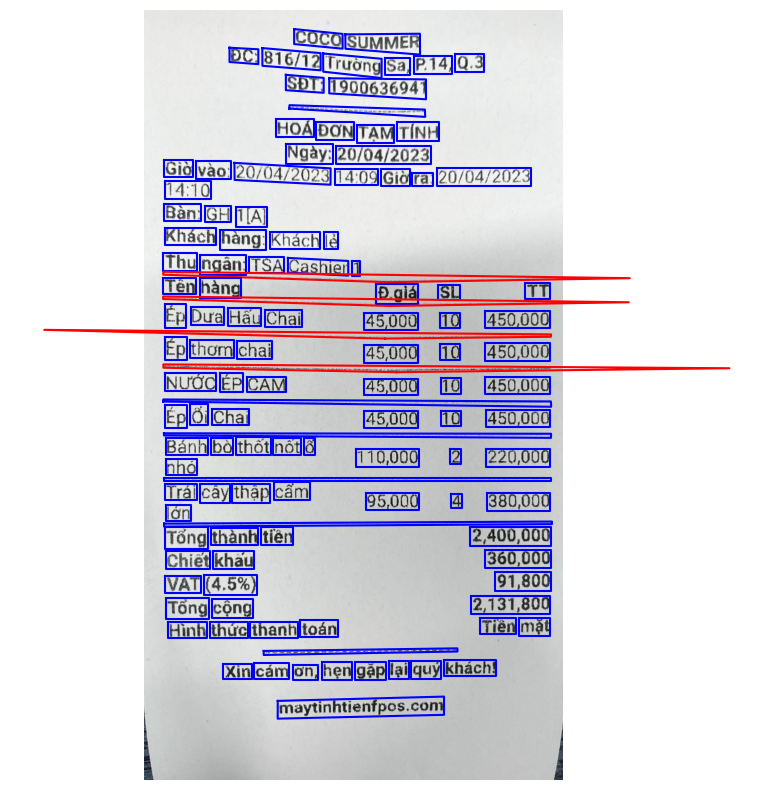

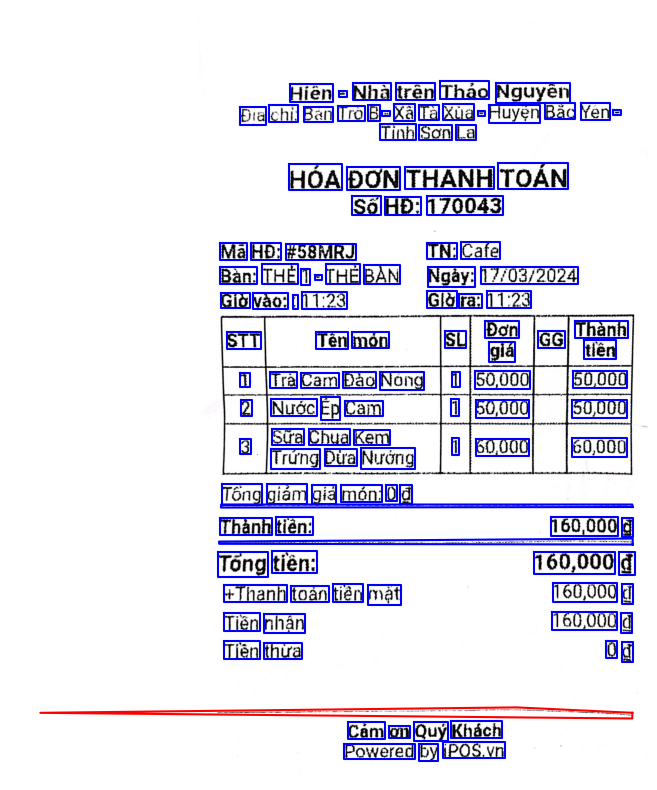

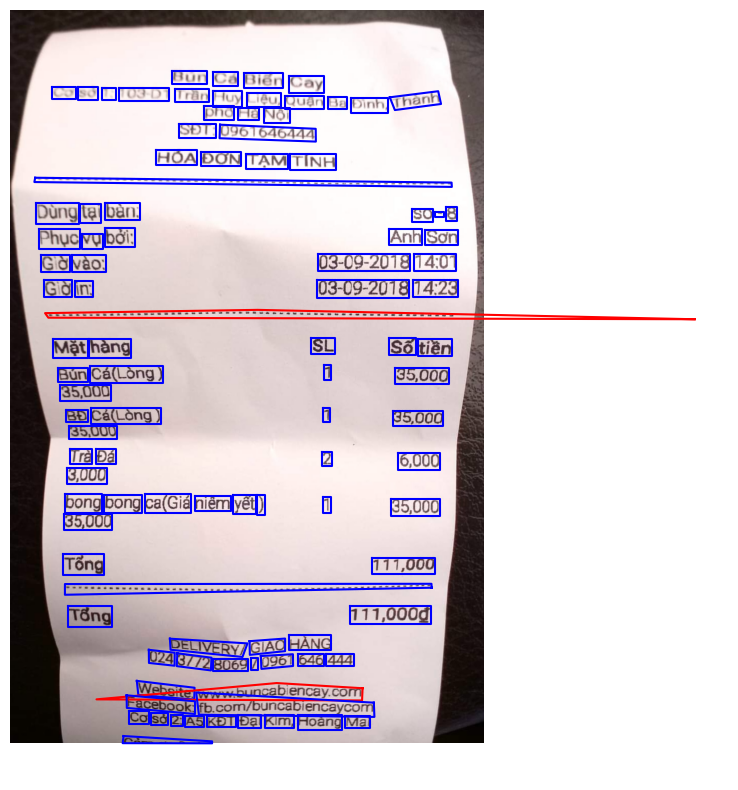

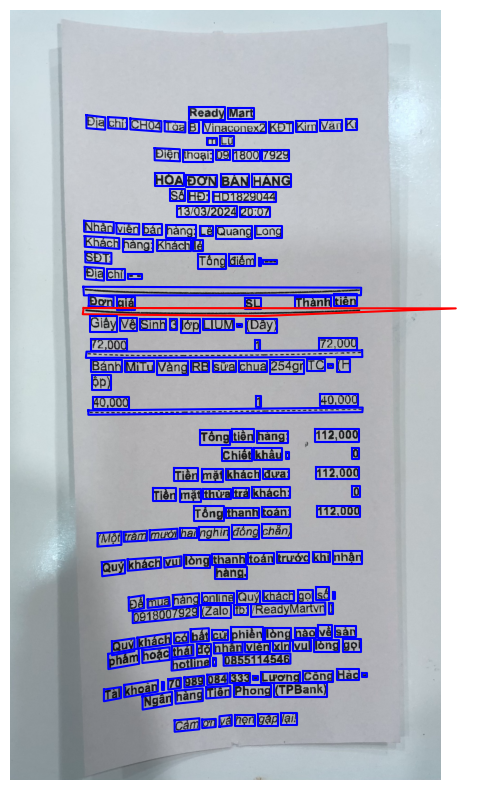

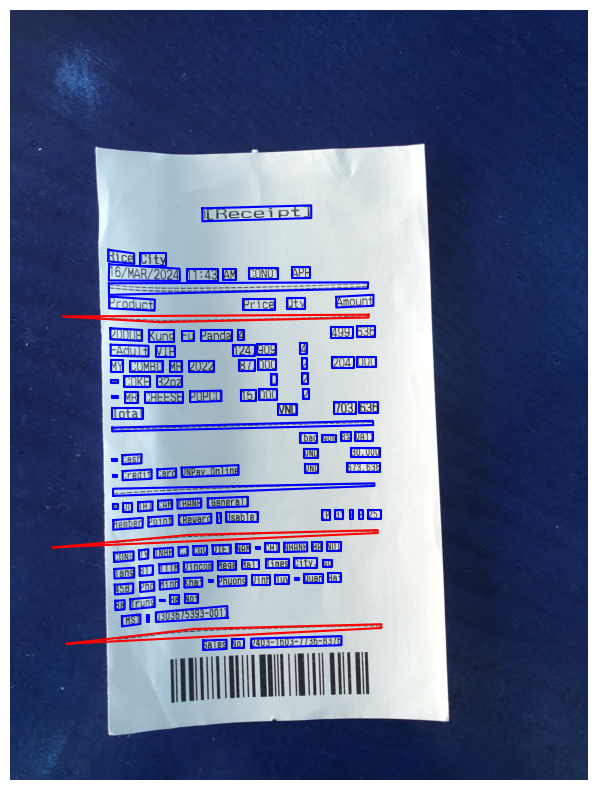

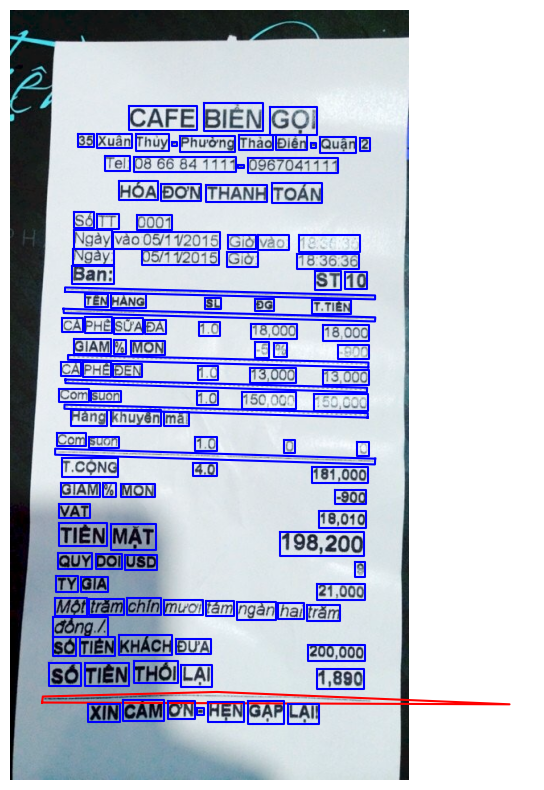

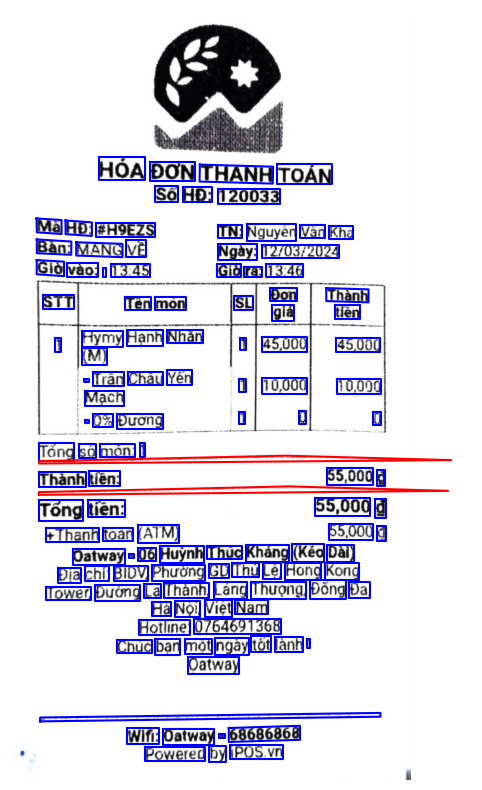

In [18]:
# dataset 지정 및 박스 위치 시각화

# '/data/ephemeral/home/data/vietnamese_receipt'
# '/data/ephemeral/home/data/japanese_receipt', 
# '/data/ephemeral/home/data/thai_receipt'
# '/data/ephemeral/home/data/chinese_receipt'

dataset_dir = '/data/ephemeral/home/data/vietnamese_receipt'
for img,idx in box_dict[dataset_dir].items():


    ufo_fpath=osp.join(dataset_dir,'ufo/train.json')
    with open(ufo_fpath,'r') as f:
        ufo_anno=json.load(f)


    img_fpath=osp.join(dataset_dir,'img/train',img)
    image=cv2.imread(img_fpath)

    bboxes=[]
    for word_info in ufo_anno['images'][img]['words'].values():
        if len(word_info['points'])>4:
            continue

        bboxes.append(np.array(word_info['points']))
    bboxes=np.array(bboxes,dtype=np.float32)

    # 새 그림 생성
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")

    for i,word in enumerate(bboxes):
        if str(i) in idx:
            plt.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="red")
        else:
            plt.plot(np.append(word[:,0],word[0,0]),np.append(word[:,1],word[0,1]), color="blue")
    plt.show()